In [51]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sbn
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('dataset/spam_ham_dataset.csv')
df.head()

Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0

In [54]:
df.drop(columns=['Unnamed: 0', 'label'], inplace=True)

In [55]:
df.isna().sum()

text         0
label_num    0
dtype: int64

In [56]:
stop_words = stopwords.words('english')
def preprocess(doc):
    doc = doc.lower()
    clean_doc = re.sub(r'[^A-Za-z0-9]', " ", doc)
    tokens = word_tokenize(clean_doc)
    clean_tokens = [token for token in tokens if token not in stop_words]

    return " ".join(clean_tokens)

In [57]:
df['clean_text'] = df['text'].apply(preprocess)

In [58]:
df.drop(columns=['text'], inplace=True)
df.head()

label_num                                         clean_text
0          0  subject enron methanol meter 988291 follow not...
1          0  subject hpl nom january 9 2001 see attached fi...
2          0  subject neon retreat ho ho ho around wonderful...
3          1  subject photoshop windows office cheap main tr...
4          0  subject indian springs deal book teco pvr reve...

In [59]:
X = df.iloc[:,1]
y = df.iloc[:,0]

In [60]:
vectorizer = CountVectorizer()
X_vectors = vectorizer.fit_transform(X)

In [61]:
X_vectors.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
pd.DataFrame(data=X_vectors.toarray(), columns=vectorizer.get_feature_names_out())

00  000  0000  000000  000000000002858  000000000049773  000080  000099  \
0      1    0     0       0                0                0       0       0   
1      0    0     0       0                0                0       0       0   
2      0    0     0       0                0                0       0       0   
3      0    0     0       0                0                0       0       0   
4      0    0     0       0                0                0       0       0   
...   ..  ...   ...     ...              ...              ...     ...     ...   
5166   0    0     0       0                0                0       0       0   
5167   0    4     0       0                0                0       0       0   
5168   0    0     0       0                0                0       0       0   
5169   0    0     0       0                0                0       0       0   
5170   0    0     0       0                0                0       0       0   

      0001  00018  ...  zynve  zyqtaqlt  zyrtec  zyyqywp  zzezrjok  zzn  zzo  \
0        0      0  ...      0         0       0        0         0    0    0   
1        0      0  ...      0         0       0        0         0    0    0   
2        0      0  ...      0         0       0        0         0    0    0   
3        0      0  ...      0         0       0        0         0    0    0   
4        0      0  ...      0         0       0        0         0    0    0   
...    ...    ...  ...    ...       ...     ...      ...       ...  ...  ...   
5166     0      0  ...      0         0       0        0         0    0    0   
5167     0      0  ...      0         0       0        0         0    0    0   
5168     0      0  ...      0         0       0        0         0    0    0   
5169     0      0  ...      0         0       0        0         0    0    0   
5170     0      0  ...      0         0       0        0         0    0    0   

      zzocb  zzso  zzsyt  
0         0     0      0  
1         0     0      0  
2         0     0      0  
3         0     0      0  
4         0     0      0  
...     ...   ...    ...  
5166      0     0      0  
5167      0     0      0  
5168      0     0      0  
5169      0     0      0  
5170      0     0      0  

[5171 rows x 50300 columns]

In [63]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzocb', 'zzso', 'zzsyt'], dtype=object)

In [64]:
vectorizer.vocabulary_

{'subject': 43460,
 'enron': 18681,
 'methanol': 30965,
 'meter': 30958,
 '988291': 4629,
 'follow': 20811,
 'note': 33135,
 'gave': 21723,
 'monday': 31652,
 '00': 0,
 'preliminary': 36594,
 'flow': 20700,
 'data': 15260,
 'provided': 37137,
 'daren': 15203,
 'please': 35965,
 'override': 34399,
 'pop': 36225,
 'daily': 15105,
 'volume': 47754,
 'presently': 36659,
 'zero': 50029,
 'reflect': 38561,
 'activity': 5142,
 'obtain': 33475,
 'gas': 21668,
 'control': 13915,
 'change': 11884,
 'needed': 32545,
 'asap': 7233,
 'economics': 17860,
 'purposes': 37381,
 'hpl': 24427,
 'nom': 33012,
 'january': 26598,
 '2001': 1116,
 'see': 40897,
 'attached': 7517,
 'file': 20340,
 'hplnol': 24434,
 '09': 214,
 'xls': 49394,
 'neon': 32611,
 'retreat': 39214,
 'ho': 24085,
 'around': 7130,
 'wonderful': 48869,
 'time': 45080,
 'year': 49647,
 'leaders': 28549,
 'know': 27874,
 'extremely': 19704,
 'hectic': 23597,
 'tough': 45447,
 'think': 44862,
 'anything': 6692,
 'past': 34858,
 'holidays':

In [65]:
X_train, X_test, y_train, y_test= train_test_split(X_vectors, y, test_size=0.2, random_state=100)

In [66]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [67]:
y_pred = model.predict(X_test)

In [68]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[712,  13],
       [ 10, 300]])

<Axes: >

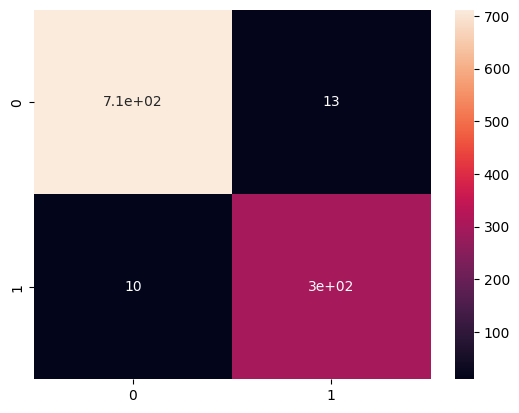

In [69]:
sbn.heatmap(cm, annot=True)

In [70]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       722
           1       0.97      0.96      0.96       313

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035

